Implementation of 1 iteration K-means algorythm to find clusters in N dimensional data.\
Plots works only having 2 dim data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Creating data

In [2]:
from sklearn.datasets import make_blobs

data, _, centers = make_blobs(n_samples=300, n_features=2, centers=6, return_centers=1, cluster_std=1, center_box=(-20,20))

# Converting to dataframe
df = pd.DataFrame(data)

# Plotting data with real centroids

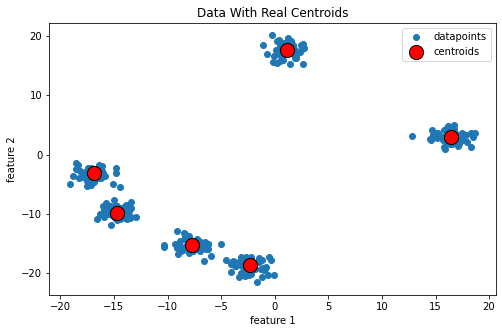

In [3]:
plt.figure(figsize=(8,5))
plt.title("Data With Real Centroids")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints")
plt.scatter(centers[:,0], centers[:,1], c="r", s=200, label="centroids", edgecolors="k")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

# Inicializing centroids

In [4]:
# Guesing how many clusters there are
K = 6

# Creating random positions for each K
my_centroids = np.random.uniform(low=df.min(), high=df.max(), size=(K, data.shape[1]))

# Converting to Dataframe
my_centroids_df = pd.DataFrame(my_centroids)

my_centroids_df

,0,1
0,-5.823533,-21.119255
1,-18.157989,-14.937898
2,-3.984719,13.190697
3,15.032068,-16.065136
4,0.730743,-5.738689
5,-10.839335,-15.474309


# Plotting data with guessed centroids

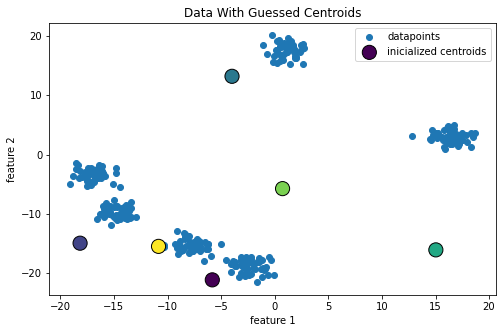

In [5]:
plt.figure(figsize=(8,5))
plt.title("Data With Guessed Centroids")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints")
plt.scatter(my_centroids_df.iloc[:,0], my_centroids_df.iloc[:,1], label="inicialized centroids", s=200, c=range(len(my_centroids_df)), edgecolors="k")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

# 1 Iteration of algorythm

In [6]:
def euclid_dist(p1, p2):
    """
    Calculates distance between 2 points in N dimensional space
    """
    summ = 0
    
    for x, y in zip(p1, p2):
        summ += (x - y)**2
    
    return np.sqrt(summ)

In [7]:
# Saving variables for later
n_datapoints = df.shape[0]
n_centers = my_centroids_df.shape[0]

# Creating array of shape
dist_to_centroids = np.empty(shape=(n_datapoints, n_centers))
dist_to_centroids.shape

(300, 6)

In [8]:
# Calculating distances from each datapoint to each centroid
for i in range(n_centers):
    for j in range(n_datapoints):
        dist_to_centroids[j][i] = euclid_dist(df.iloc[j], my_centroids_df.iloc[i])
        
# Displaying first 5 rows
dist_to_centroids[:5]

array([[32.80720519, 39.15290826, 23.37898088, 18.74330362, 18.14587158,
        33.0627318 ],
       [39.66077154, 38.08971865,  6.94111138, 36.75185444, 23.67715529,
        35.47304141],
       [ 3.31893211, 11.95651814, 31.18355855, 21.67911711, 14.1722365 ,
         4.90272723],
       [14.31445871,  6.61018422, 24.99175986, 30.03159309, 15.50381965,
         6.83258508],
       [32.29292424, 38.62510347, 23.11182089, 18.42297795, 17.61747285,
        32.53239563]])

In [9]:
# Converting to dataframe
dist_df = pd.DataFrame(dist_to_centroids)

# Displaying df of distances
print("Smallest numbers are colored green")
print("And they represents the smallest distance from each point to each centroid")
dist_df.style.highlight_min(color='lightgreen', axis=1)

Smallest numbers are colored green
And they represents the smallest distance from each point to each centroid


,0,1,2,3,4,5
0,32.807205,39.152908,23.378981,18.743304,18.145872,33.062732
1,39.660772,38.089719,6.941111,36.751854,23.677155,35.473041
2,3.318932,11.956518,31.183559,21.679117,14.172236,4.902727
3,14.314459,6.610184,24.991760,30.031593,15.503820,6.832585
4,32.292924,38.625103,23.111821,18.422978,17.617473,32.532396
5,4.823711,16.096418,31.040177,17.437986,12.445494,8.833361
6,21.293546,12.176510,20.494899,34.423019,17.719266,13.945931
7,5.262874,11.795574,29.179024,21.433551,12.404410,4.457832
8,5.267253,17.781332,32.573505,16.248768,13.596772,10.623766
9,3.596400,15.447050,31.889335,18.393221,13.525271,8.312663


In [10]:
# Labeling points by its closest centroid
labels = dist_df.idxmin(axis=1)
labels

0      4
1      2
2      0
3      1
4      4
      ..
295    1
296    1
297    2
298    5
299    1
Length: 300, dtype: int64

# Plotting data with labeled datapoints

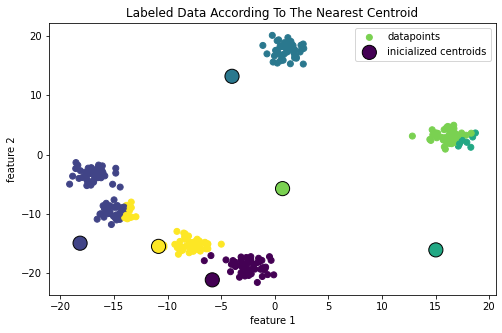

In [11]:
plt.figure(figsize=(8,5))
plt.title("Labeled Data According To The Nearest Centroid")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints", c=labels)
plt.scatter(my_centroids_df.iloc[:,0], my_centroids_df.iloc[:,1], label="inicialized centroids", s=200, c=range(len(my_centroids)), edgecolors="k")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

In [12]:
# Calculating mean for each datapoints category
my_new_centroids_df = df.groupby(by=labels).mean()
my_new_centroids_df

,0,1
0,-2.483818,-18.744128
1,-16.168311,-6.044193
2,1.130813,17.651305
3,17.897601,2.214695
4,16.182528,3.045072
5,-9.154194,-13.969825


In [13]:
# Getting which rows are missing in my_new_centers_df
missing_indexes = list(set(range(K)) - set(my_new_centroids_df.index))
missing_indexes

[]

In [14]:
# Getting coordinates of missing centroids
missing_rows = my_centroids_df.loc[missing_indexes]
missing_rows

,0,1


In [15]:
# New centroids
my_centroids = pd.concat([my_new_centroids_df, missing_rows])
my_centroids = my_centroids.sort_index()
my_centroids

,0,1
0,-2.483818,-18.744128
1,-16.168311,-6.044193
2,1.130813,17.651305
3,17.897601,2.214695
4,16.182528,3.045072
5,-9.154194,-13.969825


# Plotting data with labeled datapoints and moved centroids

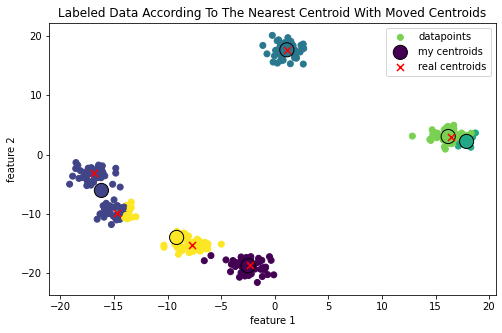

In [16]:
plt.figure(figsize=(8,5))
plt.title("Labeled Data According To The Nearest Centroid With Moved Centroids")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints", c=labels)
plt.scatter(my_centroids.iloc[:,0], my_centroids.iloc[:,1], label="my centroids", s=200, edgecolors="k", c=range(len(my_centroids)))
plt.scatter(centers[:,0], centers[:,1], c="r", marker="x", s=50, label="real centroids")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

The centroids might not end up in the correct position due to:\
    - one iteration is not enough to find real centroids\
    - too many or too little centroids has been inicialized\
    - the centroids were inicialized in unlucky starting position